# Exploring Violence Against Women Using Data Science

## Data Cleaning

In [22]:
import pandas as pd

gii_data = pd.read_csv(r'C:\Users\PC\Desktop\TU Wien\Data Science\Visual Data Science\Datasets\Gender_Inequality_Index.csv')
violence_data = pd.read_csv(r'C:\Users\PC\Desktop\TU Wien\Data Science\Visual Data Science\Datasets\violence_data.csv')

country_name_mapping = {
    "Congo Democratic Republic": "Democratic Republic of the Congo",
    "Congo": "Congo",
    "Cote d'Ivoire": "Côte d'Ivoire",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Turkey": "Türkiye",
    "Türkye": "Türkiye"
}

violence_data['Country'] = violence_data['Country'].replace(country_name_mapping)

merged_data = violence_data.merge(gii_data, on="Country", how="left")

remaining_unmatched = violence_data[~violence_data['Country'].isin(gii_data['Country'])]['Country'].unique()
print(f"Unmatched Countries After Correction: {remaining_unmatched}")

merged_data.to_csv('merged_data.csv', index=False)
print("Corrected merged dataset saved as 'merged_data.csv'.")


Unmatched Countries After Correction: ['Democratic Republic of the Congo']
Corrected merged dataset saved as 'merged_data.csv'.


In [24]:
congo_variations = gii_data[gii_data['Country'].str.contains('Congo', case=False, na=False)]
print("Congo Variations in GII Dataset:")
print(congo_variations['Country'].unique())

country_name_mapping.update({
    "Democratic Republic of the Congo": "Congo"
})

violence_data['Country'] = violence_data['Country'].replace(country_name_mapping)

final_merged_data = violence_data.merge(gii_data, on="Country", how="left")

final_remaining_unmatched = violence_data[~violence_data['Country'].isin(gii_data['Country'])]['Country'].unique()
print(f"Final Unmatched Countries After All Corrections: {final_remaining_unmatched}")

final_merged_data.to_csv('final_merged_data.csv', index=False)
print("Final corrected merged dataset saved as 'final_merged_data.csv'.")


Congo Variations in GII Dataset:
['Congo']
Final Unmatched Countries After All Corrections: []
Final corrected merged dataset saved as 'final_merged_data.csv'.


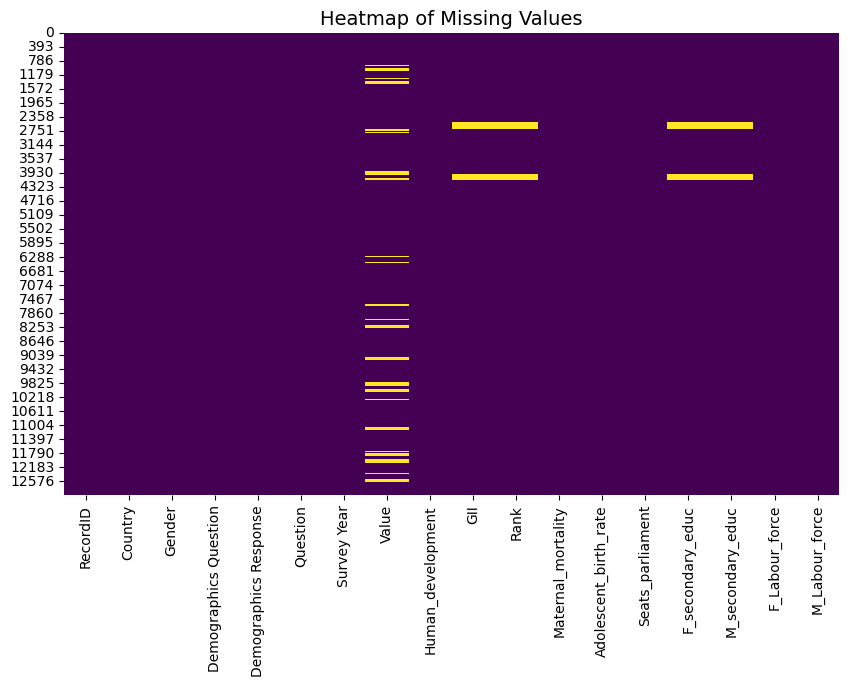

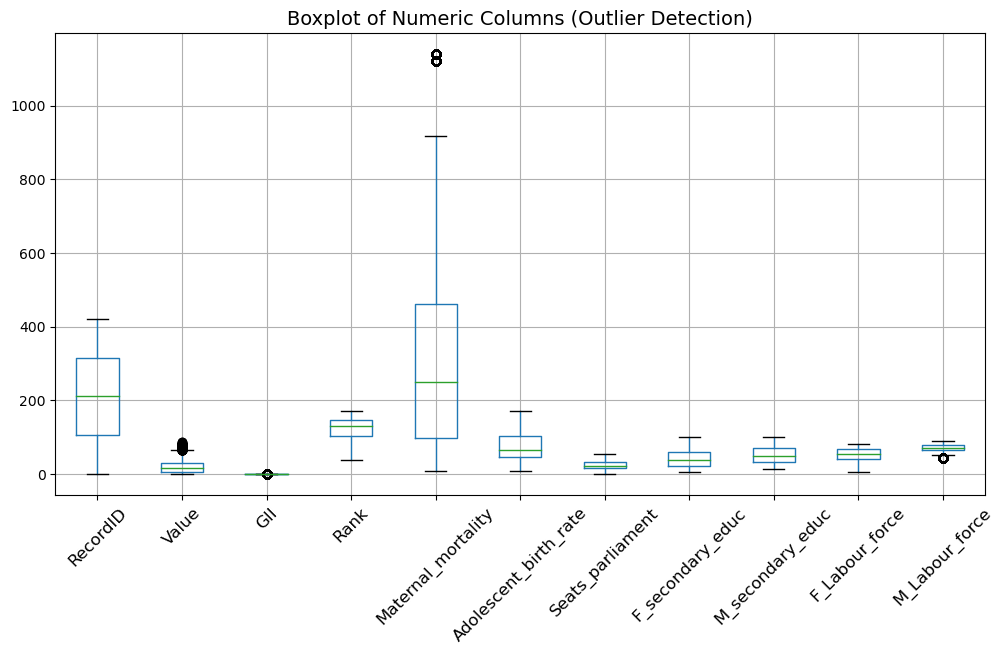

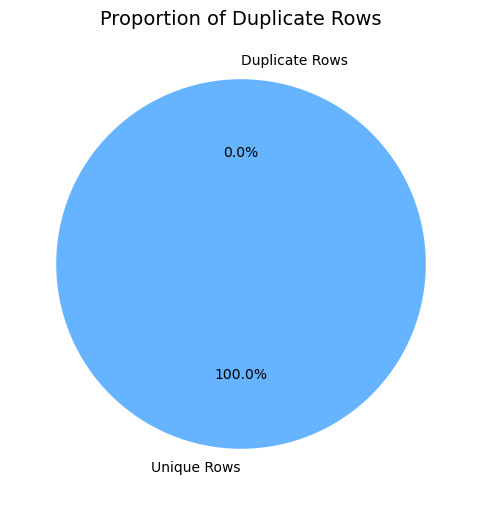

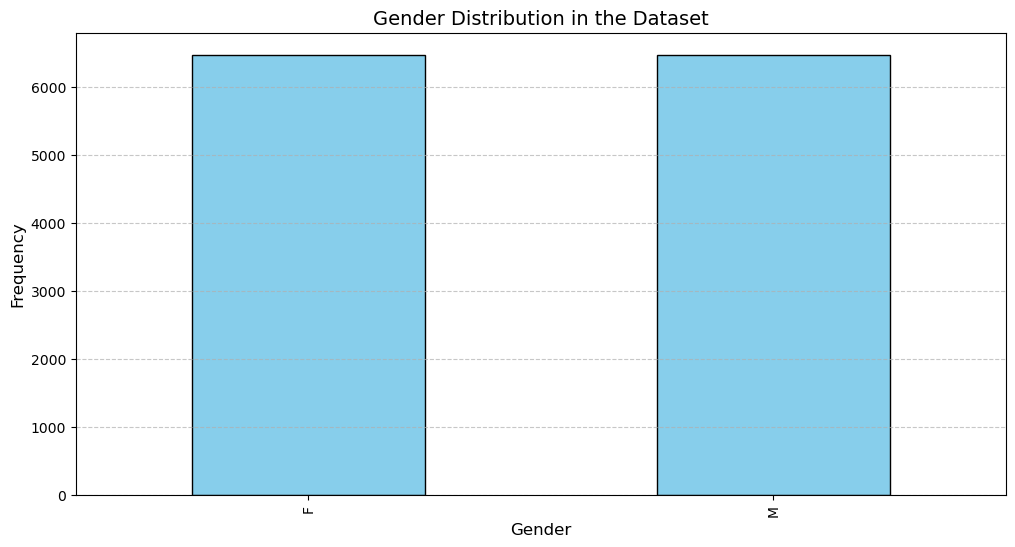

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(final_merged_data.isnull(), cbar=False, cmap="viridis")
plt.title('Heatmap of Missing Values', fontsize=14)
plt.show()

plt.figure(figsize=(12, 6))
final_merged_data[numeric_columns].boxplot()
plt.title('Boxplot of Numeric Columns (Outlier Detection)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

duplicates_count = final_merged_data.duplicated().sum()
labels = ['Unique Rows', 'Duplicate Rows']
sizes = [len(final_merged_data) - duplicates_count, duplicates_count]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Proportion of Duplicate Rows', fontsize=14)
plt.show()

plt.figure(figsize=(12, 6))
final_merged_data['Gender'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Gender Distribution in the Dataset', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [28]:
import pandas as pd

final_data = pd.read_csv(r'C:\Users\PC\Desktop\TU Wien\Data Science\Visual Data Science\Datasets\final_merged_data.xls')

missing_values = final_data.isnull().sum()

final_data_cleaned = final_data.drop_duplicates()


numeric_columns = final_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = final_data_cleaned.select_dtypes(include=['object']).columns

final_data_cleaned[numeric_columns] = final_data_cleaned[numeric_columns].fillna(final_data_cleaned[numeric_columns].median())
final_data_cleaned[categorical_columns] = final_data_cleaned[categorical_columns].fillna(final_data_cleaned[categorical_columns].mode().iloc[0])

remaining_missing_values = final_data_cleaned.isnull().sum()

cleaned_file_path = r'C:\Users\PC\Desktop\TU Wien\Data Science\Visual Data Science\Datasets\final_cleaned_data.csv' 
final_data_cleaned.to_csv(cleaned_file_path, index=False)

print("Missing Values Before Cleaning:\n", missing_values)
print("Remaining Missing Values After Cleaning:\n", remaining_missing_values)
print(f"Cleaned dataset saved at: {cleaned_file_path}")



Missing Values Before Cleaning:
 RecordID                    0
Country                     0
Gender                      0
Demographics Question       0
Demographics Response       0
Question                    0
Survey Year                 0
Value                    1473
Human_development           0
GII                       360
Rank                      360
Maternal_mortality          0
Adolescent_birth_rate       0
Seats_parliament            0
F_secondary_educ          360
M_secondary_educ          360
F_Labour_force              0
M_Labour_force              0
dtype: int64
Remaining Missing Values After Cleaning:
 RecordID                 0
Country                  0
Gender                   0
Demographics Question    0
Demographics Response    0
Question                 0
Survey Year              0
Value                    0
Human_development        0
GII                      0
Rank                     0
Maternal_mortality       0
Adolescent_birth_rate    0
Seats_parliament     

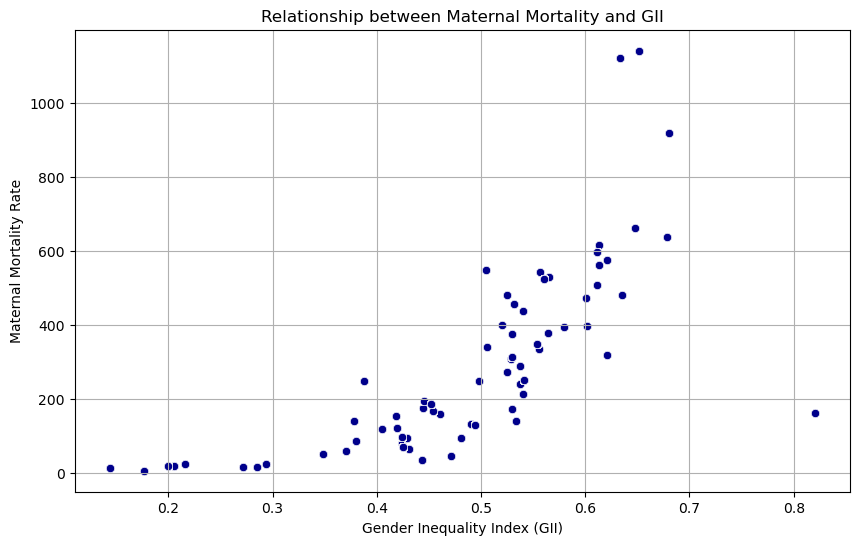

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GII', y='Maternal_mortality', data=final_data_cleaned, color='darkblue')
plt.title('Relationship between Maternal Mortality and GII')
plt.xlabel('Gender Inequality Index (GII)')
plt.ylabel('Maternal Mortality Rate')
plt.grid(True)
plt.show()


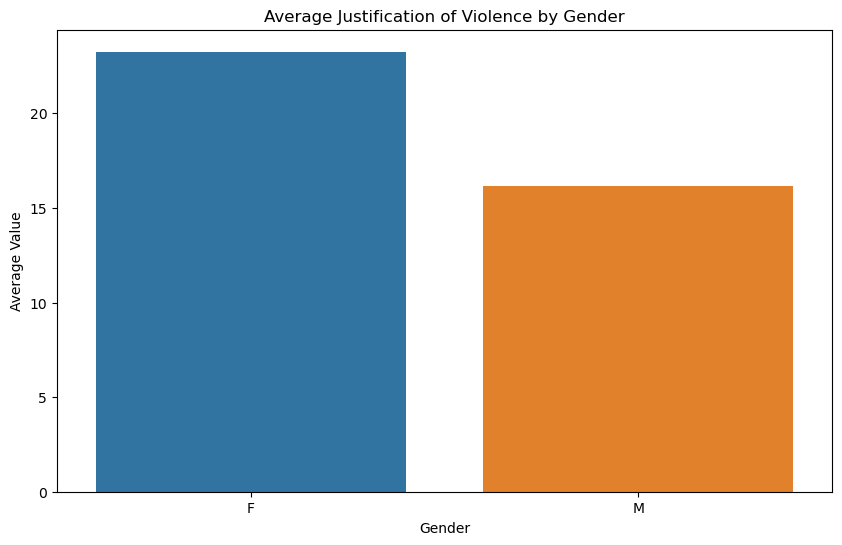

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Value', data=final_data_cleaned, estimator='mean', errorbar=None)
plt.title('Average Justification of Violence by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Value')
plt.show()


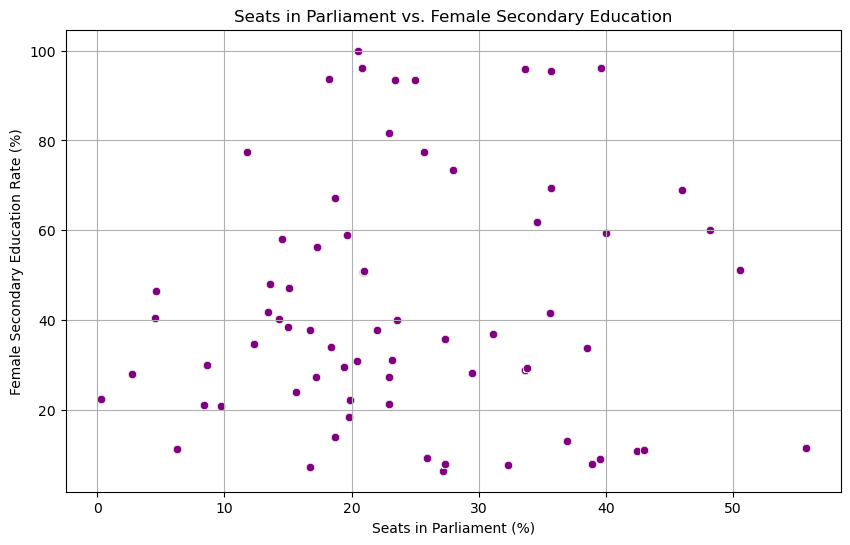

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seats_parliament', y='F_secondary_educ', data=final_data_cleaned, color='purple')
plt.title('Seats in Parliament vs. Female Secondary Education')
plt.xlabel('Seats in Parliament (%)')
plt.ylabel('Female Secondary Education Rate (%)')
plt.grid(True)
plt.show()


## Linear Regression: Gender Inequality (GII) vs. Maternal Mortality

In [37]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv(r'C:\Users\PC\Desktop\TU Wien\Data Science\Visual Data Science\Datasets\final_cleaned_data.csv')

In [39]:
regression_data = data[['GII', 'Maternal_mortality']].dropna()

X = regression_data['GII']
Y = regression_data['Maternal_mortality']

X_const = sm.add_constant(X)

model = sm.OLS(Y, X_const).fit()

predictions = model.predict(X_const)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Maternal_mortality   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                 1.412e+04
Date:                Tue, 28 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:48:51   Log-Likelihood:                -84968.
No. Observations:               12960   AIC:                         1.699e+05
Df Residuals:                   12958   BIC:                         1.700e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -385.1974      5.939    -64.859      0.0

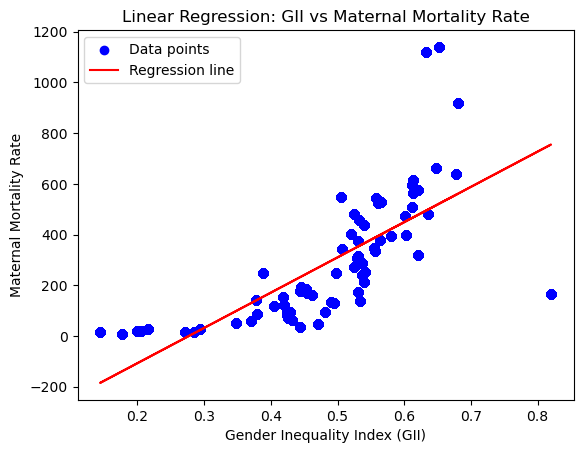

In [41]:
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, predictions, color='red', label='Regression line')
plt.xlabel('Gender Inequality Index (GII)')
plt.ylabel('Maternal Mortality Rate')
plt.title('Linear Regression: GII vs Maternal Mortality Rate')
plt.legend()
plt.show()

## Logistic Regression: Justification of Violence by Gender

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

violence_data = data[['Gender', 'Value']].dropna()
violence_data['Gender_binary'] = violence_data['Gender'].apply(lambda x: 0 if x == 'F' else 1)

X = violence_data[['Value']]
y = violence_data['Gender_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(class_report)

Accuracy: 0.5983796296296297

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.48      0.55      1297
           1       0.58      0.71      0.64      1295

    accuracy                           0.60      2592
   macro avg       0.60      0.60      0.59      2592
weighted avg       0.60      0.60      0.59      2592



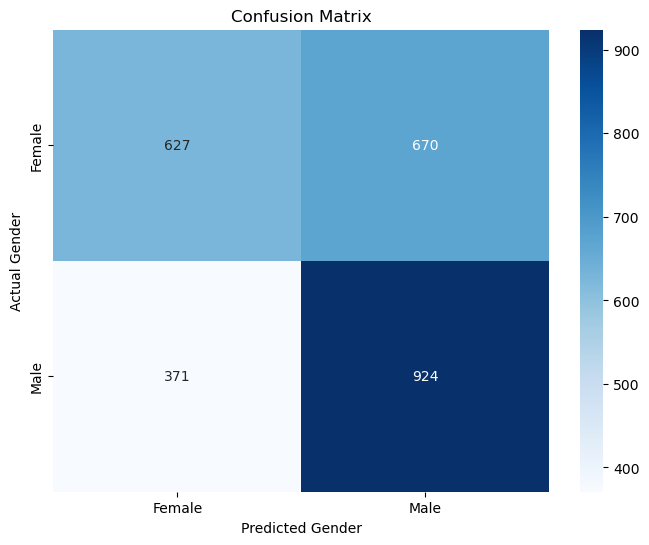

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Gender')
plt.ylabel('Actual Gender')
plt.title('Confusion Matrix')
plt.show()

## Clustering: Female Secondary Education vs. Seats in Parliament

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:8

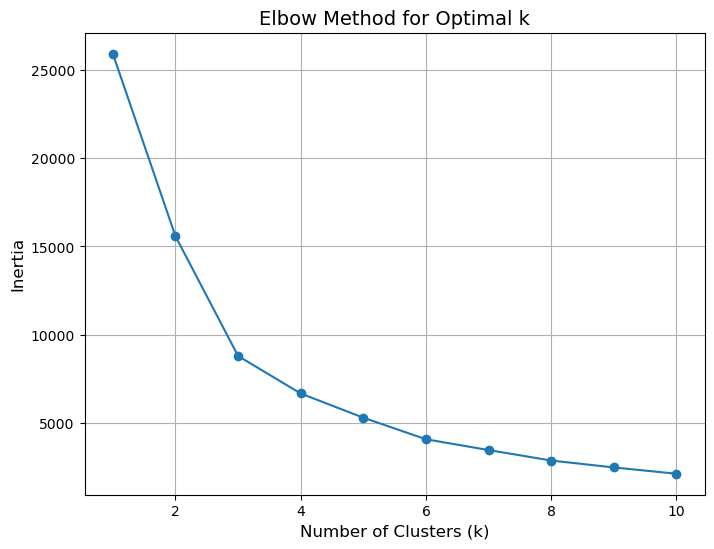

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


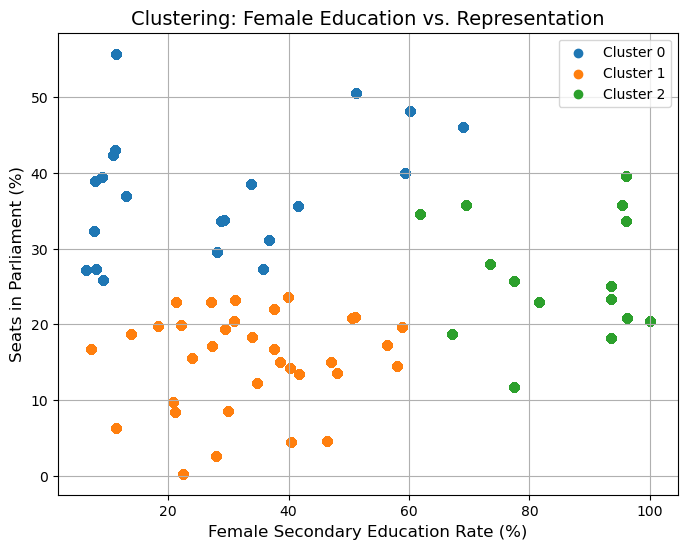

In [49]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

clustering_data = data[['F_secondary_educ', 'Seats_parliament']].dropna()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.grid(True)
plt.show()

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    cluster_data = clustering_data[clustering_data['Cluster'] == cluster]
    plt.scatter(cluster_data['F_secondary_educ'], cluster_data['Seats_parliament'], label=f'Cluster {cluster}')

plt.xlabel('Female Secondary Education Rate (%)', fontsize=12)
plt.ylabel('Seats in Parliament (%)', fontsize=12)
plt.title('Clustering: Female Education vs. Representation', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Dashboard

In [52]:
pip install dash plotly pandas geopandas

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\pc\anaconda3\lib\site-packages\fonttools-4.53.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\pc\anaconda3\lib\site-packages\ultranest-4.3.1-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [60]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Load dataset
df = pd.read_csv(r'C:\Users\PC\Desktop\TU Wien\Data Science\Visual Data Science\Datasets\final_cleaned_data.csv')

# ✅ Fix: Convert 'Survey Year' to integers
df['Survey Year'] = pd.to_datetime(df['Survey Year'], errors='coerce').dt.year
df = df.dropna(subset=['Survey Year'])  # Remove rows where year conversion failed
df['Survey Year'] = df['Survey Year'].astype(int)  # Ensure numeric format

# Initialize Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Violence Against Women - Interactive Dashboard", style={'textAlign': 'center'}),

    # Dropdown for selecting variables
    html.Div([
        html.Label("Select X Variable:"),
        dcc.Dropdown(
            id='x-axis',
            options=[{'label': col, 'value': col} for col in ['GII', 'Maternal_mortality', 'Seats_parliament', 'F_secondary_educ']],
            value='GII',
            clearable=False
        ),

        html.Label("Select Y Variable:"),
        dcc.Dropdown(
            id='y-axis',
            options=[{'label': col, 'value': col} for col in ['Maternal_mortality', 'GII', 'Seats_parliament', 'F_secondary_educ']],
            value='Maternal_mortality',
            clearable=False
        )
    ], style={'width': '40%', 'margin': 'auto'}),

    # Scatter Plot
    dcc.Graph(id='scatter-plot'),

    # Bar Chart
    dcc.Graph(id='bar-chart'),

    # Box Plot
    dcc.Graph(id='box-plot'),

    # ✅ Fix: Remove Heatmap (since Latitude/Longitude is missing)

    # Year Slider
    html.Label("Select Year:"),
    dcc.Slider(
        id='year-slider',
        min=df['Survey Year'].min(),
        max=df['Survey Year'].max(),
        value=df['Survey Year'].min(),
        marks={str(year): str(year) for year in sorted(df['Survey Year'].unique())},
        step=1
    )
])

@app.callback(
    Output('scatter-plot', 'figure'),
    Output('bar-chart', 'figure'),
    Output('box-plot', 'figure'),
    Input('x-axis', 'value'),
    Input('y-axis', 'value'),
    Input('year-slider', 'value')
)
def update_graphs(x_var, y_var, selected_year):
    # 🔥 Fix: Use a broader filter to include more data
    filtered_df = df[df['Survey Year'] <= selected_year]

    scatter_fig = px.scatter(
        filtered_df, x=x_var, y=y_var, color="Country",
        title=f"Scatter Plot: {x_var} vs {y_var}"
    )

    bar_fig = px.bar(
        filtered_df.groupby("Gender")["Value"].mean().reset_index(),
        x="Gender", y="Value",
        title="Average Justification of Violence by Gender",
        color="Gender"
    )

    box_fig = px.box(
        df, y=y_var, title=f"Box Plot of {y_var} (Outlier Detection)"
    )

    return scatter_fig, bar_fig, box_fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8050)


In [66]:
!pip install dash-bootstrap-components

  Obtaining dependency information for dash-bootstrap-components from https://files.pythonhosted.org/packages/c3/87/4db3b56e9a6813d413a0f20e053aa163d652babb629a8bf7b871af4a075f/dash_bootstrap_components-1.7.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/229.3 kB ? eta -:--:--
   ------ -------------------------------- 41.0/229.3 kB 960.0 kB/s eta 0:00:01
   ----------------------------------- ---- 204.8/229.3 kB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 229.3/229.3 kB 2.8 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\users\pc\anaconda3\lib\site-packages\fonttools-4.53.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at c:\users\pc\anaconda3\lib\site-packages\ultranest-4.3.1-py3.11-win-amd64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [70]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px
import dash_bootstrap_components as dbc

# Load dataset
df = pd.read_csv(r'C:\Users\PC\Desktop\TU Wien\Data Science\Visual Data Science\Datasets\final_cleaned_data.csv')

# ✅ Convert 'Survey Year' to numeric values
df['Survey Year'] = pd.to_datetime(df['Survey Year'], errors='coerce').dt.year
df = df.dropna(subset=['Survey Year'])
df['Survey Year'] = df['Survey Year'].astype(int)

# 🎨 Choose a modern Bootstrap theme
app = dash.Dash(__name__, external_stylesheets=[dbc.themes.LUX])

# 🌟 Create Layout
app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H1("📊 Violence Against Women - Interactive Dashboard",
                        className="text-center mb-4"), width=12)
    ]),

    dbc.Row([
        dbc.Col([
            html.Label("Select X Variable:", className="fw-bold"),
            dcc.Dropdown(
                id='x-axis',
                options=[{'label': col, 'value': col} for col in 
                         ['GII', 'Maternal_mortality', 'Seats_parliament', 'F_secondary_educ']],
                value='GII',
                clearable=False
            ),
        ], width=6),
        
        dbc.Col([
            html.Label("Select Y Variable:", className="fw-bold"),
            dcc.Dropdown(
                id='y-axis',
                options=[{'label': col, 'value': col} for col in 
                         ['Maternal_mortality', 'GII', 'Seats_parliament', 'F_secondary_educ']],
                value='Maternal_mortality',
                clearable=False
            ),
        ], width=6)
    ], className="mb-4"),

    dbc.Row([
        dbc.Col(dcc.Graph(id='scatter-plot'), width=6),
        dbc.Col(dcc.Graph(id='time-series-plot'), width=6),
    ]),

    dbc.Row([
        dbc.Col(dcc.Graph(id='bar-chart'), width=6),
        dbc.Col(dcc.Graph(id='violin-plot'), width=6),
    ]),

    dbc.Row([
        dbc.Col(dcc.Graph(id='box-plot'), width=6),
        dbc.Col(dcc.Graph(id='heatmap-plot'), width=6),
    ]),

    dbc.Row([
        dbc.Col([
            html.Label("Select Year:", className="fw-bold"),
            dcc.Slider(
                id='year-slider',
                min=df['Survey Year'].min(),
                max=df['Survey Year'].max(),
                value=df['Survey Year'].min(),
                marks={str(year): str(year) for year in sorted(df['Survey Year'].unique())},
                step=1
            ),
        ], width=12)
    ], className="mt-4")
], fluid=True)

# 🎯 Callback Function for Updates
@app.callback(
    Output('scatter-plot', 'figure'),
    Output('time-series-plot', 'figure'),
    Output('bar-chart', 'figure'),
    Output('violin-plot', 'figure'),
    Output('box-plot', 'figure'),
    Output('heatmap-plot', 'figure'),
    Input('x-axis', 'value'),
    Input('y-axis', 'value'),
    Input('year-slider', 'value')
)
def update_graphs(x_var, y_var, selected_year):
    # ✅ Fix: Use broader year filter to show more data
    filtered_df = df[(df['Survey Year'] >= selected_year - 5) & (df['Survey Year'] <= selected_year)]

    # 📌 Scatter Plot
    scatter_fig = px.scatter(filtered_df, x=x_var, y=y_var, color="Country",
                             title=f"Scatter Plot: {x_var} vs {y_var}")

    # 📌 Time-Series Line Plot
    time_series_fig = px.line(filtered_df, x="Survey Year", y=y_var, color="Country",
                              title=f"{y_var} Over Time")

    # 📌 Bar Chart - Gender-Based Violence Justification
    bar_fig = px.bar(filtered_df.groupby("Gender")["Value"].mean().reset_index(),
                     x="Gender", y="Value", title="Average Justification of Violence by Gender",
                     color="Gender")

    # 📌 Violin Plot - Distribution by Gender
    violin_fig = px.violin(filtered_df, x="Gender", y=y_var, box=True, points="all",
                           title=f"Distribution of {y_var} by Gender")

    # 📌 Box Plot - Outlier Detection
    box_fig = px.box(df, y=y_var, title=f"Box Plot of {y_var} (Outlier Detection)")

    # 📌 Heatmap - Correlation Matrix
    corr_matrix = df[['GII', 'Maternal_mortality', 'Seats_parliament', 'F_secondary_educ']].corr()
    heatmap_fig = px.imshow(corr_matrix, text_auto=True, title="Correlation Heatmap")

    return scatter_fig, time_series_fig, bar_fig, violin_fig, box_fig, heatmap_fig

# ✅ Run App
if __name__ == '__main__':
    app.run_server(debug=True, port=8050)
